In [1]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import sklearn
import cv2
#import sys
import random
import tensorflow as tf
from tensorflow import keras
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [2]:
# define the image size and image path
IMG_WIDTH=128
IMG_HEIGHT=128
img_train_folder=r'dataset\pictures\train\128x128'
#img_test_folder=r'dataset\pictures\test\128x128'
img_test_folder_non_treated=r'dataset\pictures\test\128x128\non-treated'
#img_train_folder=r'dataset\pictures\train\random'
#img_test_folder=r'dataset\pictures\test\random'

In [ ]:
##########################################################################
# auxiliary code to visualize all pictures of dataset (random mixed files)
##########################################################################
plt.figure(figsize=(40,40))
j = 0

for file in os.listdir(img_train_folder):
    image_path= os.path.join(img_train_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(15,15,j+1)
    ax.title.set_text(file)
    plt.imshow(img)
    j+=1
######################################################

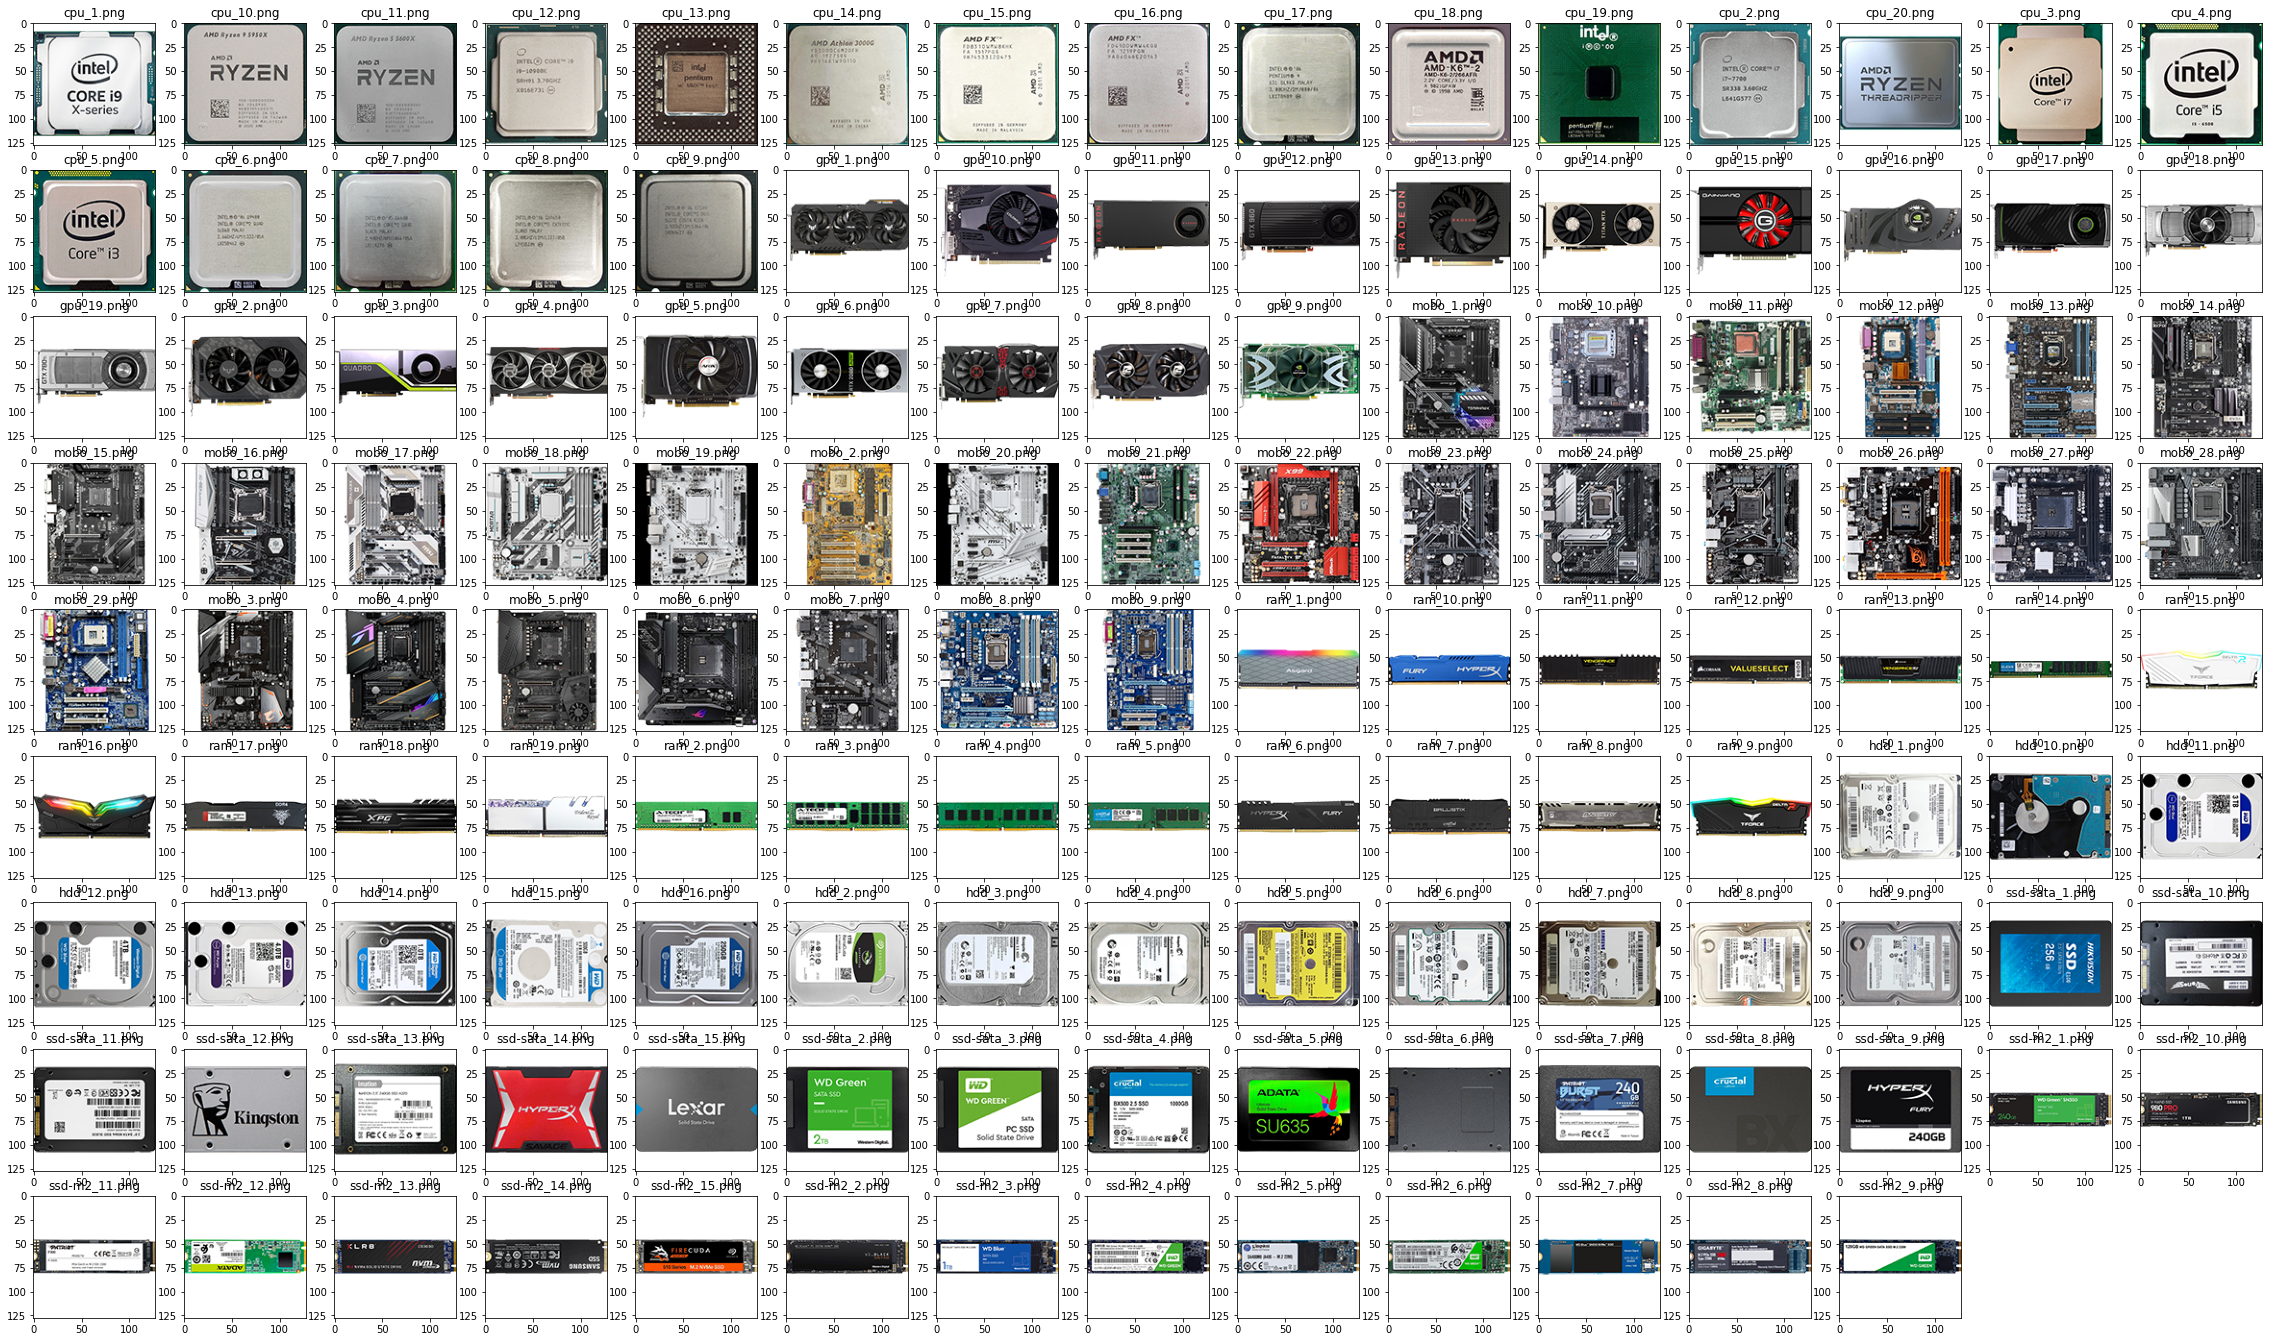

In [4]:
#########################################################################
# auxiliary code to visualize all pictures of dataset (inside subfolders)
#########################################################################
plt.figure(figsize=(40,40))
j = 0

for dir1 in os.listdir(img_train_folder):
    for file in os.listdir(os.path.join(img_train_folder, dir1)):
        image_path= os.path.join(img_train_folder, dir1)
        image_path2= os.path.join(image_path, file)    
        img=mpimg.imread(image_path2)
        ax=plt.subplot(15,15,j+1)
        ax.title.set_text(file)
        plt.imshow(img)
        j+=1
######################################################

In [ ]:
# function to gather pictures and generate a numpy array (random mixed files)
def create_dataset(img_folder):
   
    img_data_array = []
    class_name = []
   
    for file in os.listdir(img_folder):
        image_path = os.path.join(img_folder, file)
        image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
        image = np.array(image)
        image = image.astype('float32')
        image /= 255 
        img_data_array.append(image)
        #class_name.append(int(dir1))
    return img_data_array, class_name

In [5]:
# function to gather pictures and generate a numpy array (inside subfolders)
def create_dataset(img_folder):
   
    img_data_array = []
    class_name = []
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image_path = os.path.join(img_folder, dir1, file)
            image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
            image = np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(int(dir1))
    return img_data_array, class_name

In [6]:
# dataset import
X_array1, y_array1 = create_dataset(img_train_folder)
X_array2, y_array2 = create_dataset(img_test_folder_non_treated)
X_train = np.array(X_array1)
y_train = np.array(y_array1)
X_test = np.array(X_array2)
y_test = np.array(y_array2)
print('treinamento completo:', X_train.shape)
print('testes:              ', X_test.shape)

treinamento completo: (133, 128, 128, 3)
testes:               (105, 128, 128, 3)


In [7]:
# separação dos dados de treinamento e validação
X_valid, X_train = X_train[:10], X_train[10:]
y_valid, y_train = y_train[:10], y_train[10:]
print('treinamento:', X_train.shape)
print('validação:   ', X_valid.shape)

treinamento: (123, 128, 128, 3)
validação:    (10, 128, 128, 3)


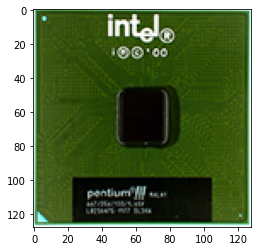

In [8]:
plt.imshow(X_train[0], cmap='binary')
plt.show()

In [ ]:
print(y_train)

In [9]:
# enumerate the classes found
class_names = ['cpu', 'gpu', 'mobo', 'ram', 'hd', 'ssd-sata', 'ssd-m2']
class_names[y_train[10]]

'gpu'

In [ ]:
###################################################################
# auxiliary code to visualize the array generated from the pictures
###################################################################
#np.set_printoptions(threshold=sys.maxsize)
print(X_train)
###################################################################

In [20]:
# build the neural network layers
keras.backend.clear_session() # clears the session
np.random.seed(42) # random seed, but fixed
tf.random.set_seed(42) # random seed, but fixed

model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[128, 128, 3]),
            keras.layers.Dense(10000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(100, activation='relu'),
            keras.layers.Dense(7, activation='softmax')
        ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 10000)             491530000 
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              10001000  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 707       
Total params: 501,631,807
Trainable params: 501,631,807
Non-trainable params: 0
_________________________________________________________________


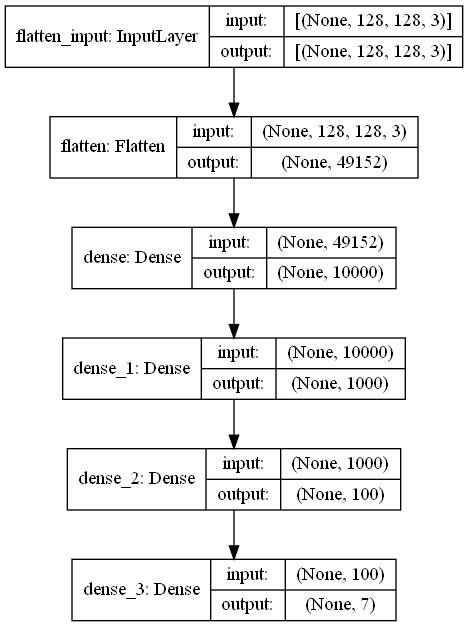

In [21]:
tf.keras.utils.plot_model(model, 'pc_hardware_model.png', show_shapes=True)

In [26]:
# obtém pesos e vieses da camada
weights, biases = hidden1.get_weights()
print('weights:', weights.shape)
print('biases: ', biases.shape)

weights: (49152, 10000)
biases:  (10000,)


In [27]:
weights

array([[ 3.3147493e-03, -1.1882912e-03, -2.9633655e-03, ...,
        -4.3913680e-03, -9.9530621e-03,  7.9496223e-03],
       [-1.3790056e-03, -5.8374060e-03,  6.3310191e-03, ...,
        -7.7098208e-03,  6.5485351e-03, -4.3885200e-03],
       [ 6.3355286e-03, -3.3687004e-03, -6.7054909e-03, ...,
        -3.8582166e-03, -7.5182421e-03,  9.4117336e-03],
       ...,
       [ 1.8556658e-03,  6.0945116e-03, -7.2555589e-03, ...,
         1.6152086e-03, -4.3802694e-03, -8.7946653e-05],
       [ 6.1473940e-03, -3.6063679e-03, -1.4006551e-03, ...,
         9.2843194e-03, -2.6998925e-03,  3.5234941e-03],
       [-9.5608858e-03,  6.6780448e-03, -5.1555377e-03, ...,
        -2.4577156e-03,  1.7595552e-03,  5.3691119e-04]], dtype=float32)

In [28]:
biases

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [30]:
# esta chamada pode demorar um pouco
%time history = model.fit(X_train, y_train, epochs=120, validation_data=(X_valid, y_valid))

Epoch 1/120
4/4 [==============================] - 7s 2s/step - loss: 4.7590 - accuracy: 0.2358 - val_loss: 2.1395 - val_accuracy: 0.0000e+00
Epoch 2/120
4/4 [==============================] - 6s 2s/step - loss: 3.8632 - accuracy: 0.3333 - val_loss: 4.0119 - val_accuracy: 0.0000e+00
Epoch 3/120
4/4 [==============================] - 7s 2s/step - loss: 1.2518 - accuracy: 0.6016 - val_loss: 4.6756 - val_accuracy: 0.0000e+00
Epoch 4/120
4/4 [==============================] - 6s 2s/step - loss: 1.1188 - accuracy: 0.5772 - val_loss: 1.6657 - val_accuracy: 0.0000e+00
Epoch 5/120
4/4 [==============================] - 7s 2s/step - loss: 0.7463 - accuracy: 0.7642 - val_loss: 1.7918 - val_accuracy: 0.2000
Epoch 6/120
4/4 [==============================] - 6s 2s/step - loss: 0.6020 - accuracy: 0.8211 - val_loss: 0.5019 - val_accuracy: 1.0000
Epoch 7/120
4/4 [==============================] - 6s 2s/step - loss: 0.5119 - accuracy: 0.8455 - val_loss: 0.6353 - val_accuracy: 0.8000
Epoch 8/120
4/4 [=

In [31]:
# os dados do treinamento estão disponíveis no histórico retornado
print('parâmetros:', history.params)
print('métricas:  ', list(history.history.keys()))
print('épocas:    ', history.epoch)

parâmetros: {'verbose': 1, 'epochs': 120, 'steps': 4}
métricas:   ['loss', 'accuracy', 'val_loss', 'val_accuracy']
épocas:     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


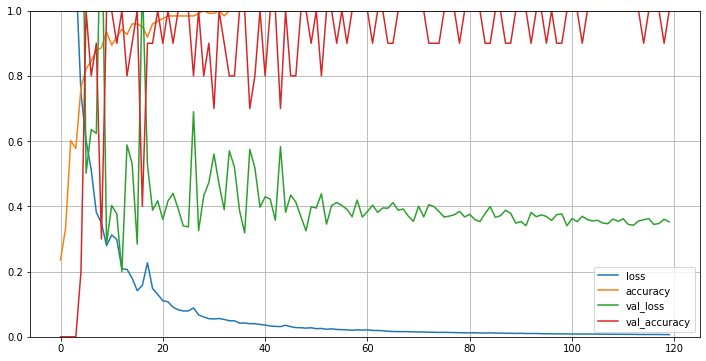

In [32]:
pd.DataFrame(history.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
# avaliação com conjunto de teste
model.evaluate(X_test, y_test)

4/4 [==============================] - 3s 406ms/step - loss: 4.5157 - accuracy: 0.2571


[4.515696048736572, 0.2571428716182709]

In [38]:
# probabilidades computadas para três instâncias de teste
X_new = X_test[:20]
y_proba = model.predict(X_new)
print(y_proba.round(2))

[[0.03 0.01 0.03 0.01 0.34 0.48 0.1 ]
 [0.   0.   0.   0.99 0.   0.   0.  ]
 [0.09 0.51 0.21 0.11 0.07 0.   0.  ]
 [0.02 0.67 0.04 0.25 0.02 0.   0.  ]
 [0.01 0.5  0.06 0.23 0.2  0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.19 0.06 0.21 0.47 0.07 0.   0.  ]
 [0.   0.   0.   0.   0.85 0.14 0.  ]
 [0.15 0.01 0.16 0.04 0.35 0.28 0.01]
 [0.02 0.14 0.08 0.71 0.04 0.   0.  ]
 [0.83 0.   0.04 0.11 0.02 0.   0.  ]
 [0.   0.92 0.01 0.06 0.01 0.   0.  ]
 [0.03 0.   0.05 0.88 0.04 0.   0.  ]
 [0.05 0.06 0.8  0.01 0.08 0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.03 0.   0.13 0.73 0.08]
 [0.   0.98 0.   0.02 0.   0.   0.  ]
 [0.   0.99 0.   0.01 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.98 0.   0.02 0.   0.   0.  ]]


In [39]:
# classes previstas e reais para as mesmas três instâncias de teste
y_pred = np.argmax(model.predict(X_new), axis=-1)
print('previstas: ', np.array(class_names)[y_pred])
print('reais:     ', np.array(class_names)[y_test[:20]])

previstas:  ['ssd-sata' 'ram' 'gpu' 'gpu' 'gpu' 'gpu' 'ram' 'hd' 'hd' 'ram' 'cpu'
 'gpu' 'ram' 'mobo' 'gpu' 'ssd-sata' 'gpu' 'gpu' 'gpu' 'gpu']
reais:      ['cpu' 'cpu' 'cpu' 'cpu' 'cpu' 'cpu' 'cpu' 'cpu' 'cpu' 'cpu' 'cpu' 'cpu'
 'cpu' 'cpu' 'cpu' 'gpu' 'gpu' 'gpu' 'gpu' 'gpu']


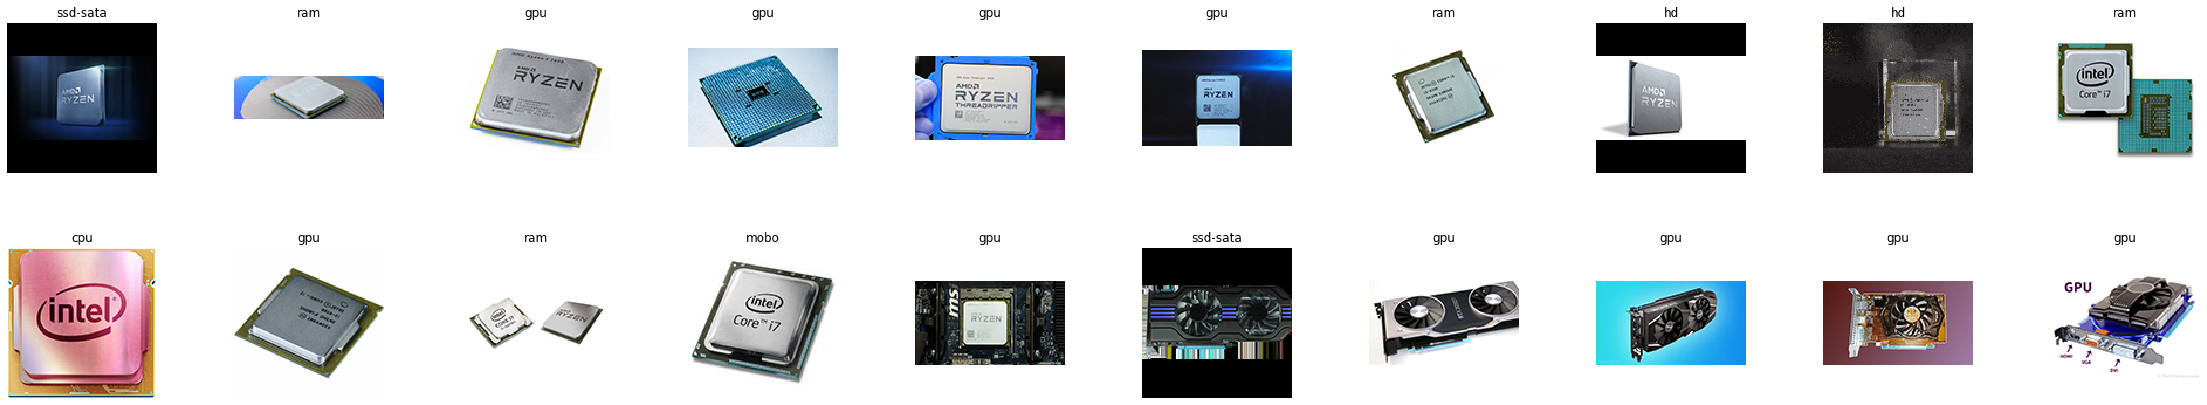

In [40]:
# visualização das tres instâncias
plt.figure(figsize=(40, 40))
for index, image in enumerate(X_new):
    plt.subplot(10, 10, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()